In [2]:
import torch 
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

/Users/prishamarpu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
import pandas as pd
patient = '100'
conditions = ['N','L','R','V','/','A','f','F']
feature_size=10

def store_function(patient):
    
    annotations_file = "mit_data/"+patient+"annotations.txt"
    with open(annotations_file, 'r') as file:
        lines = file.readlines()
    csv_file = "mit_data/"+str(patient)+".csv"
    datafile = pd.read_csv(csv_file)

    time_list = []
    sample_list = []
    type_list = []
    feature_list = []
    for line in lines[12:-11]:
        row = line.strip().split()
        if(row[2] in conditions):
            time_list.append(row[0])
            sample_list.append(int(row[1]))
            type_list.append(row[2])
            storage_list = []
            for i in range(int(row[1])-feature_size,int(row[1])+feature_size+1):
                try: 
                    storage_list.append(datafile.iloc[i]["'MLII'"])
                except KeyError:
                    storage_list.append(datafile.iloc[i]["'V5'"])
            feature_list.append(storage_list)

    return time_list, sample_list, type_list, feature_list, datafile

time_list, sample_list, type_list, feature_list, datafile = store_function(patient)

#feature_list.append(datafile.iloc[int(row[1])-10:int(row[1])+10]["'MLII'"])

In [4]:
print(datafile)
datafile.iloc[0:5]["'MLII'"]


        'sample #'  'MLII'  'V5'
0                0     995  1011
1                1     995  1011
2                2     995  1011
3                3     995  1011
4                4     995  1011
...            ...     ...   ...
649995      649995    1009   928
649996      649996     935   942
649997      649997     889   951
649998      649998     871   957
649999      649999     768  1024

[650000 rows x 3 columns]


0    995
1    995
2    995
3    995
4    995
Name: 'MLII', dtype: int64

In [5]:
#access the patients
import os

onlyfiles = [file for file in os.listdir('mit_data') if os.path.isfile(os.path.join('mit_data', file))]
unique_ids = sorted(set(file[:3] for file in onlyfiles if len(file) > 3))
unique_ids.pop(0)  # Remove the first element, assuming it's not needed

print(unique_ids)
time_list, sample_list, type_list, feature_list, datafile = store_function(unique_ids[0])  




['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']


100
101


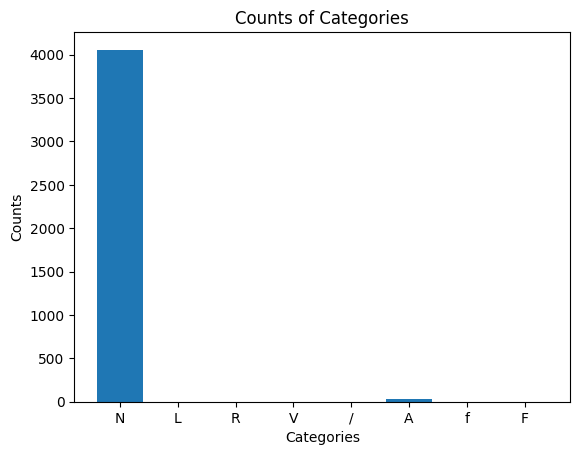

In [44]:
import matplotlib.pyplot as plt
labels_map = {
    0: "N",
    1: "L",
    2: "R",
    3: "V",
    4: "/",
    5: "A",
    6: "f",
    7: "F"
}

count_map = {
    "N":0,
    "L":0,
    "R":0,
    "V":0,
    "/":0,
    "A":0,
    "f":0,
    "F":0
}

reverse_map = {
    "N":0,
    "L":1,
    "R":2,
    "V":3,
    "/":4,
    "A":5,
    "f":6,
    "F":7
}

type_list_all = []
feature_list_all = []
for i in unique_ids[0:2]:
    print(i)
    time_list, sample_list, type_list, feature_list, datafile = store_function(i)  
    type_list_all.append([reverse_map[i] for i in type_list])
    feature_list_all.append(feature_list)
    for j in type_list:
        count_map[j] +=1

plt.bar(count_map.keys(), count_map.values())
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Counts of Categories')
plt.show()


In [38]:
print(len(feature_list_all))

2


In [45]:
import pandas as pd
import numpy as np
import torch

zero = np.array(type_list_all[0])
one = np.array(type_list_all[1])
print(zero.shape)
print(one.shape)
print(type_list_all)

print(feature_list_all)
feature_list_all = np.array(np.concatenate(feature_list_all,axis=0))
print(len(type_list_all))
print(feature_list_all.shape)
type_list_all = np.array(np.concatenate(type_list_all,axis=0))
print("Type List All")
print(type_list_all.shape)


# Normalize signals (optional)
mean = feature_list_all.mean(axis=0)
std = feature_list_all.std(axis=0)
signals = (feature_list_all - mean) / std

# Convert signals and labels to PyTorch tensors
signals_tensor = torch.tensor(signals, dtype=torch.float32)
labels_tensor = torch.tensor(type_list_all, dtype=torch.long)[:,None]

# Print shapes to verify
print("Signals Tensor Shape:", signals_tensor.shape)
print("Labels Tensor Shape:", labels_tensor.shape)

for i  in type_list_all:
    if i!=0 and i!=5:
        print(i)


(2252,)
(1842,)
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

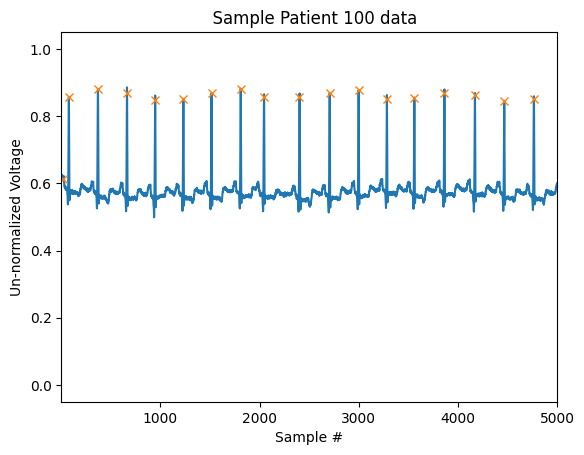

In [9]:
import random
def z_norm(result):  
    result = (result-min(result))/(max(result)-min(result))
    return result
def get_patient_data(patient,norm=True, sample_plot=False):
    widths= [4,8,11,6,3,5,5,8]
    
    patient=str(patient)
    ecg_notes= pd.read_fwf('mit_data/{}annotations.txt'.format(patient),widths=widths).drop(['Unnamed: 0'],axis=1)
    ecg_data= pd.read_csv('mit_data/{}.csv'.format(patient))
    ecg_data.columns= ['samp_num','signal','V']
    ecg_notes=ecg_notes[['Sample #','Type','Aux']]
    ecg_notes.columns=['sample_num','type','aux']
    ecg_data.signal= z_norm(ecg_data.signal)
    if sample_plot == True:
        peaklist= ecg_notes.sample_num.astype(int).values
        plt.figure()
        b=random.choice(ecg_data.signal)
        plt.plot(ecg_data.signal)
        plt.xlim(b,b+5000)
        plt.plot(peaklist, ecg_data.signal[peaklist], "x")
        plt.title('  Sample Patient {} data'.format(patient))
        return None
        
    return ecg_data.signal,ecg_notes


get_patient_data(patient,norm=True,sample_plot=True)
plt.ylabel('Un-normalized Voltage')
plt.xlabel('Sample #')
plt.draw()

In [52]:
import os
import pandas as pd

class CustomArrhythmiaDataset(Dataset):
    def __init__(self, feature_list_all, type_list_all ):
        self.feature_list_all = feature_list_all
        self.type_list_all = type_list_all

    def __len__(self):
        return len(self.type_list_all)

    def __getitem__(self, idx):
        feature = self.feature_list_all[idx]
        label = self.type_list_all[idx]
        print("Type List All",self.type_list_all[idx])
        return feature, label

In [54]:
from torch.utils.data import DataLoader
import random


train_size = 0.7  
val_size = 0.1    
test_size = 0.2   


random.shuffle(feature_list)

train_split = int(len(feature_list) * train_size)
val_split = train_split + int(len(feature_list) * val_size)


train_data = feature_list[:train_split]
val_data = feature_list[train_split:val_split]
test_data = feature_list[val_split:]


print("Length of Training Data:", len(train_data))
print("Length of Validation Data:", len(val_data))
print("Length of Testing Data:", len(test_data))

train_dataset = CustomArrhythmiaDataset(train_data, type_list_all[:train_split])
val_dataset = CustomArrhythmiaDataset(val_data, type_list_all[train_split:val_split])
test_dataset = CustomArrhythmiaDataset(test_data, type_list_all[val_split:])

batch_size = 1

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Length of Training Data: 1289
Length of Validation Data: 184
Length of Testing Data: 369


In [12]:
print(train_dataset[0])



([956, 950, 952, 968, 1009, 1066, 1137, 1219, 1297, 1355, 1372, 1342, 1272, 1193, 1122, 1075, 1058, 1047, 1030, 1011, 994], 0)


In [19]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
device = "cpu"
print(f"Using {device} device")

Using cpu device


In [55]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=2*feature_size+1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8, 512)
        self.fc2 = nn.Linear(512, len(conditions))

    def forward(self, x):
        print(x.shape)
        x = x.unsqueeze(1)  
        print(x.shape)
        x = self.pool(torch.relu(self.conv1(x)))
        print(x.shape)
        x = self.pool(torch.relu(self.conv2(x)))
        print(x.shape)
        x = self.pool(torch.relu(self.conv3(x)))
        print(x.shape)
        x = torch.flatten(x, 1)  
        print(x.shape)
        x = torch.relu(self.fc1(x))
        print(x.shape)
        x = self.fc2(x)
        return x


model = CNN()
print(model)


CNN(
  (conv1): Conv1d(21, 16, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv3): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=8, bias=True)
)


In [58]:
import torch
import torch.nn as nn
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 1


for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0

    for labels, inputs in enumerate(train_dataloader):
        print("Inputs",inputs)
        print("Labels",labels)

        inputs=torch.tensor(inputs)
        labels=torch.tensor(labels).to(torch.int)
        
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)

        
        loss.backward()
        optimizer.step()

        
        running_loss += loss.item()

    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_dataloader)}")

print("Training complete.")

Type List All 0
Inputs [[tensor([920]), tensor([922]), tensor([934]), tensor([966]), tensor([1016]), tensor([1076]), tensor([1145]), tensor([1219]), tensor([1275]), tensor([1297]), tensor([1276]), tensor([1223]), tensor([1160]), tensor([1110]), tensor([1081]), tensor([1067]), tensor([1054]), tensor([1038]), tensor([1015]), tensor([1002]), tensor([990])], tensor([0])]
Labels 0


ValueError: expected sequence of length 21 at dim 1 (got 1)

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2])


In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [ ]:

loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)


        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306395  [   64/60000]
loss: 2.289224  [ 6464/60000]
loss: 2.282892  [12864/60000]
loss: 2.251267  [19264/60000]
loss: 2.284372  [25664/60000]
loss: 2.235191  [32064/60000]
loss: 2.220590  [38464/60000]
loss: 2.192304  [44864/60000]
loss: 2.171156  [51264/60000]
loss: 2.183296  [57664/60000]
Test Error: 
 Accuracy: 47.7%, Avg loss: 2.168401 

Epoch 2
-------------------------------
loss: 2.186865  [   64/60000]
loss: 2.127919  [ 6464/60000]
loss: 2.156564  [12864/60000]
loss: 2.114685  [19264/60000]
loss: 2.055160  [25664/60000]
loss: 2.079516  [32064/60000]
loss: 2.012615  [38464/60000]
loss: 1.977399  [44864/60000]
loss: 1.954687  [51264/60000]
loss: 1.949767  [57664/60000]
Test Error: 
 Accuracy: 59.4%, Avg loss: 1.926234 

Epoch 3
-------------------------------
loss: 1.905416  [   64/60000]
loss: 1.943895  [ 6464/60000]
loss: 1.859536  [12864/60000]
loss: 1.839421  [19264/60000]
loss: 1.859195  [25664/60000]
loss: 1.716004  [32064/600

In [ ]:
import torchvision.models as models

In [ ]:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/prishamarpu/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100.0%


In [ ]:
model = models.vgg16() # we do not specify ``weights``, i.e. create untrained model
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
torch.save(model, 'model.pth')
model = torch.load('model.pth')